<a href="https://colab.research.google.com/github/dangvinhhoa06/AI-Thay-Thinh/blob/main/AI_W7_17_03_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bài mtcars.csv**

In [ ]:
import pandas as pd
url='mtcars.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,mpg,disp,hp,wt
0,Mazda RX4,21.0,160.0,110,2.620
1,Mazda RX4 Wag,21.0,160.0,110,2.875
2,Datsun 710,22.8,108.0,93,2.320
3,Hornet 4 Drive,21.4,258.0,110,3.215
4,Hornet Sportabout,18.7,360.0,175,3.440


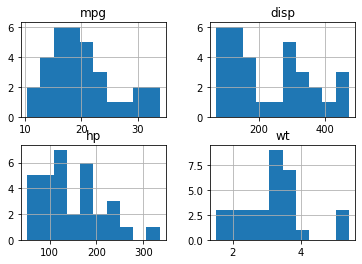

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [ ]:
correlation = data.corr()
print(correlation)

#mpg số dặm trên 1 galon, disp dung tích buồng đốt, hp ngựa, wt khối lượng xe
#- tỷ lệ nghịch, + thuận


           mpg      disp        hp        wt
mpg   1.000000 -0.847551 -0.776168 -0.867659
disp -0.847551  1.000000  0.790949  0.887980
hp   -0.776168  0.790949  1.000000  0.658748
wt   -0.867659  0.887980  0.658748  1.000000


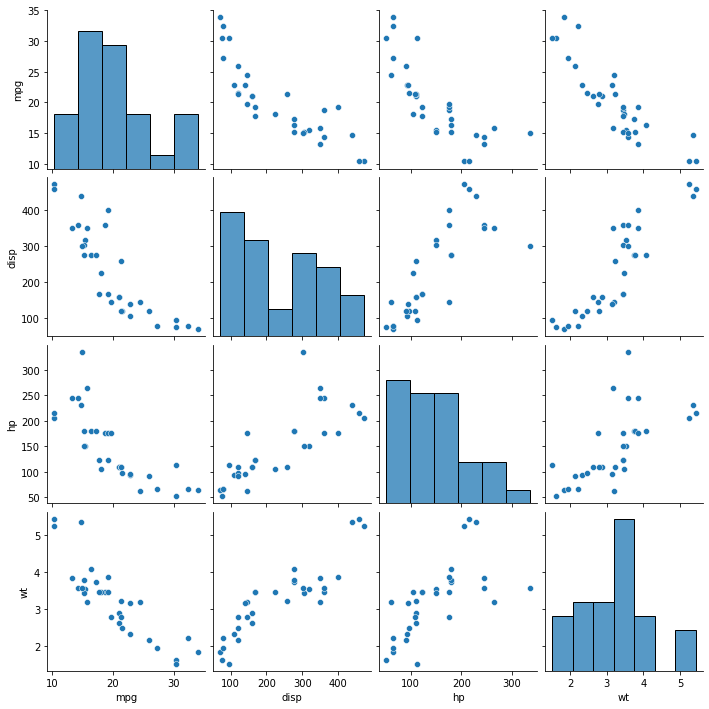

In [ ]:
sns.pairplot(data)


<Axes: >

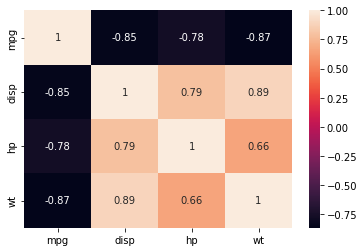

In [ ]:
sns.heatmap(correlation,annot=True) #biểu diễn cái ở trên dưới màu sắc

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='wt', ylabel='mpg'>

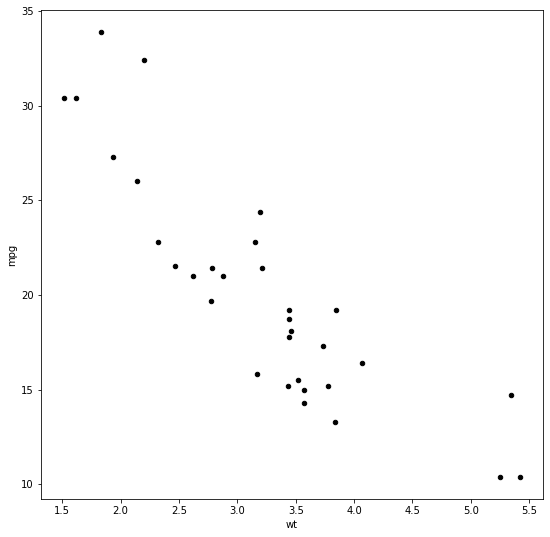

In [ ]:
data.plot(kind='scatter',x='wt',y='mpg',figsize=(9,9),color='black' )


In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['wt']),y=data['mpg'])
print('Giá trị Intercept là: ',model.intercept_)
print('Giá trị Coeffient là: ',model.coef_)


Giá trị Intercept là:  37.28512616734204
Giá trị Coeffient là:  [-5.34447157]


In [ ]:
X=pd.DataFrame(data['wt'])
y=data['mpg']
model.score(X,y) #Đánh giá độ chính xác: 75%

0.7528327936582646

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


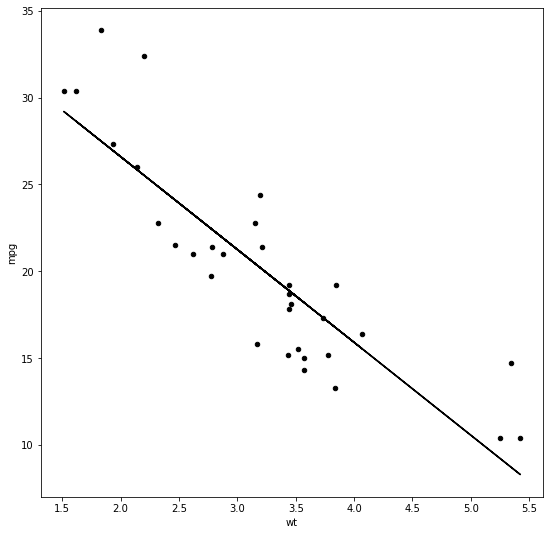

In [ ]:
y_pred = model.predict(X)                 #y predict, Giá trị dự báo, hay y mũ
data.plot(kind='scatter',x='wt',y='mpg',figsize=(9,9),color='black' )
plt.plot(data['wt'],y_pred, color='black')    #Hồi quy bậc 1


In [ ]:
model = linear_model.LinearRegression()
X=pd.DataFrame([data['wt'],data['wt']**2]).T   #T: Transpose, chuyển vị
model.fit(X,y=data['mpg'])
print("Hệ số Intercept: ",model.intercept_)
print("Hệ số coeffient là: ",model.coef_)
print("Độ chính xác của mô hình: ", model.score(X,y))  
#y=-13,88x + 1,17.x^2 + 49,93
#Accuracy = 81,9%


Hệ số Intercept:  49.93081094945181
Hệ số coeffient là:  [-13.38033708   1.17108689]
Độ chính xác của mô hình:  0.8190613581384094


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


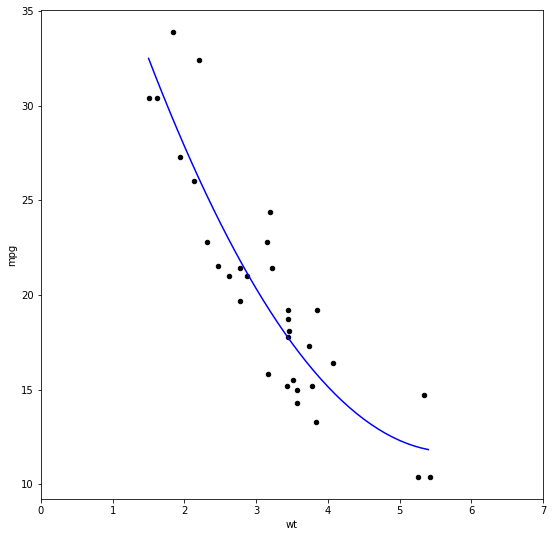

In [ ]:
#Hồi quy bậc 2
import numpy as np
range = np.arange(1.5,5.5,0.1)
X_range = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter', x='wt', y='mpg', figsize=(9,9), color ='black', xlim=(0,7))
plt.plot(range, y_pred, color='blue')

In [ ]:
#Bậc 3
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**2, data['wt']**3]).T
model.fit(X, y = data['mpg'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X, y = data['mpg']))
### y = 0.046(x^3) + 0.69(x^2) - 11.82x + 48.4
###y= coef[n] (x^n) + coef[n-1](x^n-1) + ... + Intercept
### Accurary = 82%

Hệ số Intercept: 48.40369622795221
Hệ số Coeffient: [-11.82597602   0.68937919   0.04593618]
Độ chính xác của mô hình: 0.8191284628478992


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


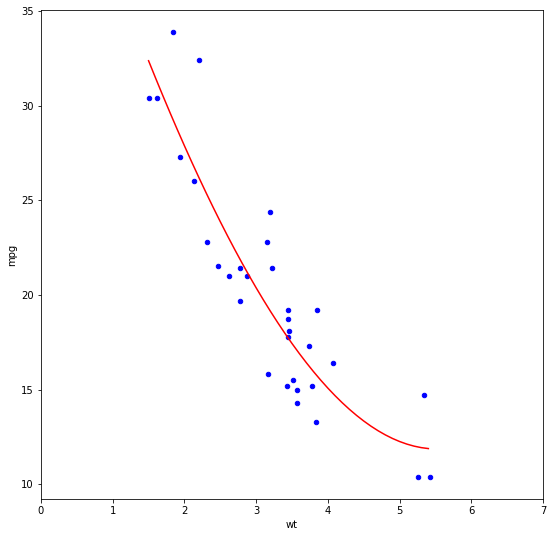

In [ ]:
range = np.arange(1.5, 5.5, 0.1)
X_range = pd.DataFrame([range,range**2,range**3]).T
y_pred = model.predict(X_range)
data.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9,9), color = 'blue', xlim = (0,7))
plt.plot(range, y_pred, color = 'red')

**Hồi quy đa biến**

In [ ]:
#Đặt lại biến 

In [ ]:
model=linear_model.LinearRegression()
y='mpg'
model.fit(X=data.loc[:,['wt','hp']],y=data['mpg'])
print('He so intercept la: ',model.intercept_)
print('He so coeffient la: ',model.coef_)
print('Do chinh xac cua mo hinh: ',X,y)

In [ ]:
model=linear_model.LinearRegression()
y='mpg'
model.fit(X=data.loc[:,['wt','hp','disp']],y=data['mpg'])
print('He so intercept la: ',model.intercept_)
print('He so coeffient la: ',model.coef_)
print('Do chinh xac cua mo hinh: ',X,y)

**Bài 50_Startups.**


In [ ]:

#50_Startups.csv
#y=profit
url='50_Startups.csv'
data = pd.read_csv(url)
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


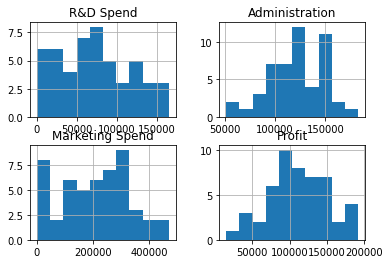

In [ ]:
data.hist()
plt.show()

In [ ]:
correlation = data.corr()
print(correlation)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


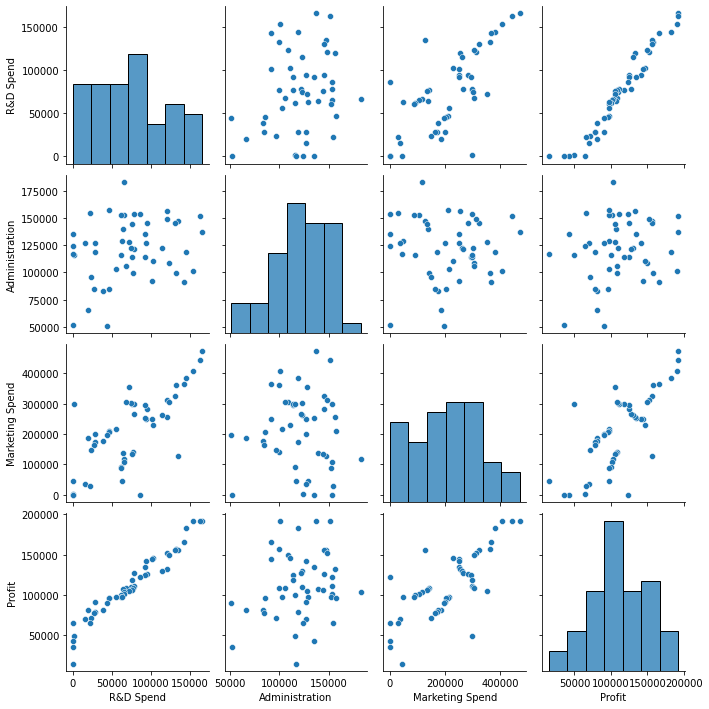

In [ ]:
sns.pairplot(data)

<Axes: >

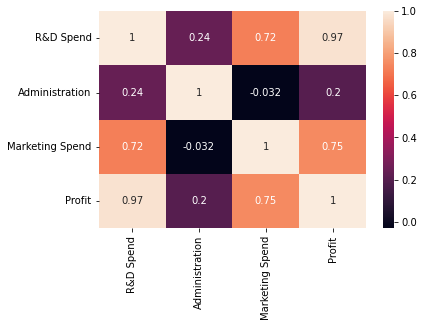

In [ ]:
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Profit', ylabel='R&D Spend'>

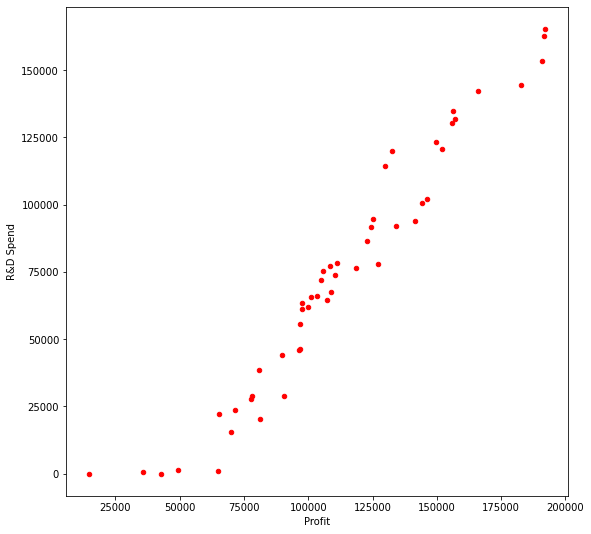

In [ ]:
data.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(9,9),color='red' )

In [ ]:
#hồi quy bậc 1
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['Profit']),y=data['R&D Spend'])
print('Giá trị Intercept là: ',model.intercept_)
print('Giá trị Coeffient là: ',model.coef_)
#y=1.10797715*x + (-50385.82883510302)

Giá trị Intercept là:  -50385.82883510302
Giá trị Coeffient là:  [1.10797715]


In [ ]:
X=pd.DataFrame(data['Profit'])
y=data['R&D Spend']
model.score(X,y) #Đánh giá độ chính xác: 75%

0.9465353160804393

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


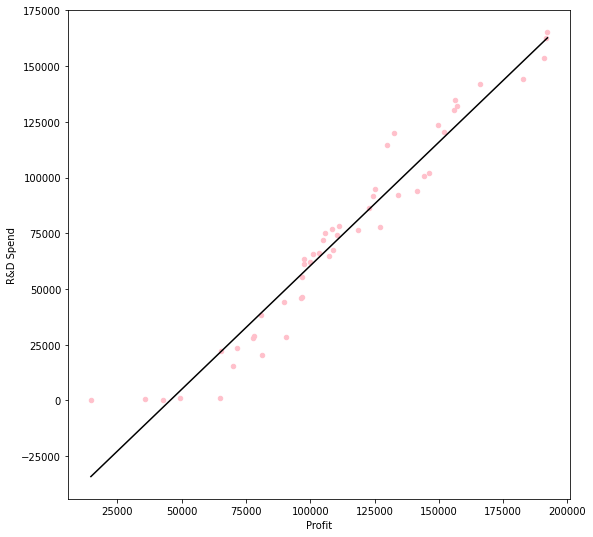

In [ ]:
y_pred = model.predict(X)                 #y predict, Giá trị dự báo, hay y mũ
data.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(9,9),color='pink' )
plt.plot(data['Profit'],y_pred, color='black')    #Hồi quy bậc 1

In [ ]:
model = linear_model.LinearRegression()
# Profit
# R&D Spend
X=pd.DataFrame([data['Profit'],data['Profit']**2]).T   #T: Transpose, chuyển vị
model.fit(X,y=data['R&D Spend'])
print("Hệ số Intercept: ",model.intercept_)
print("Hệ số coeffient là: ",model.coef_)
print("Độ chính xác của mô hình: ", model.score(X,y))  
#y=(0.00000119427444 x^2) + (0.839353178.x) + (-37182.30912423563)
#Accuracy = 0.9497292340096265

Hệ số Intercept:  -37182.30912423563
Hệ số coeffient là:  [8.39353178e-01 1.19427444e-06]
Độ chính xác của mô hình:  0.9497292340096265


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


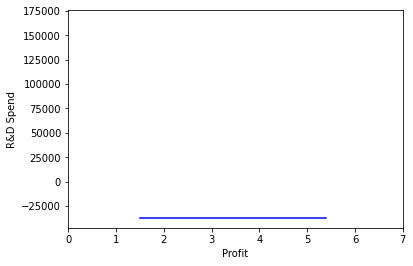

In [ ]:
import numpy as np
range = np.arange(1.5,5.5,0.1)
X_range = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter', x='Profit', y='R&D Spend',  color ='black', xlim=(0,7))
plt.plot(range, y_pred, color='blue')

**Bài Advertising**

In [ ]:
url='Advertising.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


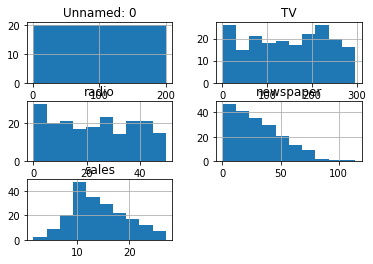

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [ ]:
correlation = data.corr()
print(correlation)

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


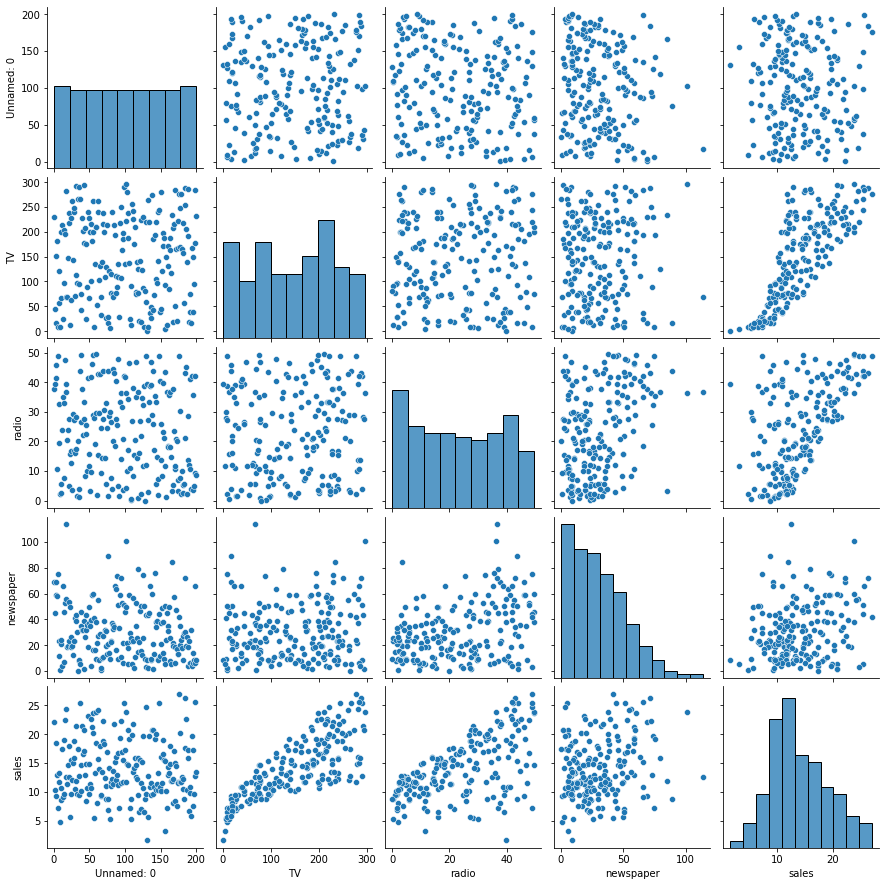

In [ ]:
sns.pairplot(data)

<Axes: >

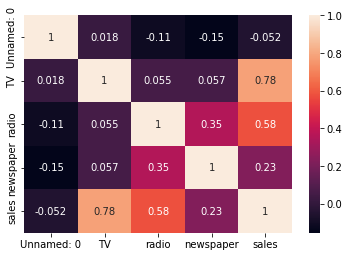

In [ ]:
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='sales', ylabel='TV'>

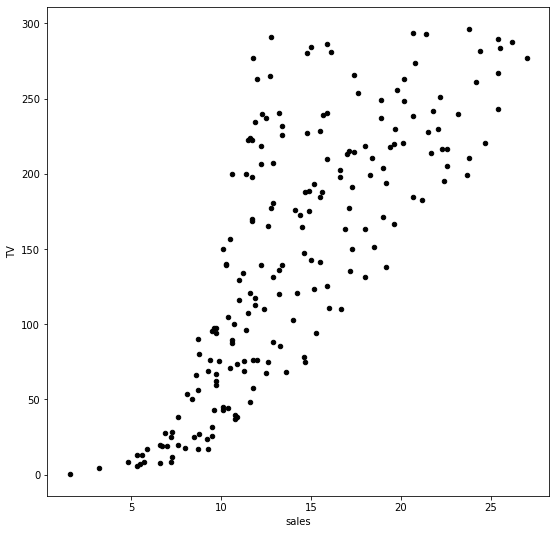

In [ ]:
data.plot(kind='scatter',x='sales',y='TV',figsize=(9,9),color='black' )

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['sales']),y=data['TV'])
print('Giá trị Intercept là: ',model.intercept_)
print('Giá trị Coeffient là: ',model.coef_)

Giá trị Intercept là:  -33.45022776511354
Giá trị Coeffient là:  [12.87165112]


In [ ]:
X=pd.DataFrame(data['sales'])
y=data['TV']
model.score(X,y) #Đánh giá độ chính xác: 61%

0.6118750508500711

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


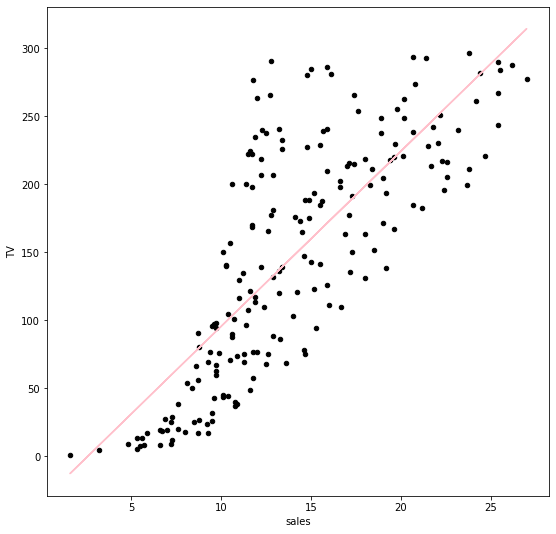

In [ ]:
y_pred = model.predict(X)                 #y predict, Giá trị dự báo, hay y mũ
data.plot(kind='scatter',x='sales',y='TV',figsize=(9,9),color='black' )
plt.plot(data['sales'],y_pred, color='pink')    #Hồi quy bậc 1

In [ ]:
#Hồi quy bậc 2
model = linear_model.LinearRegression()
X=pd.DataFrame([data['sales'],data['sales']**2]).T   #T: Transpose, chuyển vị
model.fit(X,y=data['TV'])
print("Hệ số Intercept: ",model.intercept_)
print("Hệ số coeffient là: ",model.coef_)
print("Độ chính xác của mô hình: ", model.score(X,y))  
#y=-0.49690844x^2 + 1,27.85355059.x -132.36742019420328
#Accuracy = 64.66%

Hệ số Intercept:  -132.36742019420328
Hệ số coeffient là:  [27.85355059 -0.49690844]
Độ chính xác của mô hình:  0.6466470605819978


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


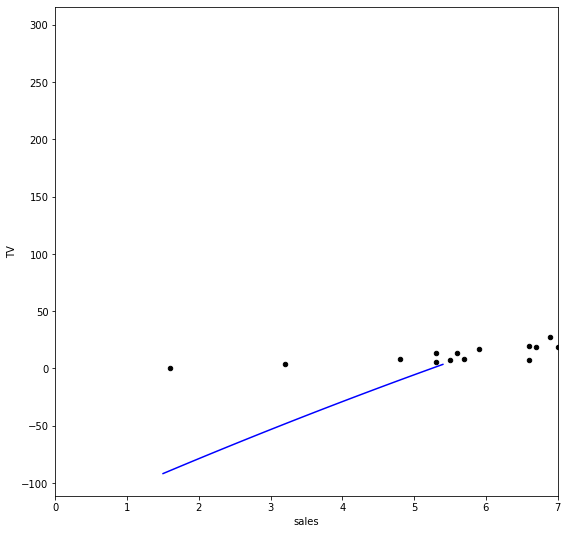

In [ ]:
#Hồi quy bậc 2 Vẽ
import numpy as np
range = np.arange(1.5,5.5,0.1)
X_range = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X_range)
data.plot(kind='scatter', x='sales', y='TV', figsize=(9,9), color ='black', xlim=(0,7))
plt.plot(range, y_pred, color='blue')

In [ ]:
#Bậc 3
model = linear_model.LinearRegression()
X = pd.DataFrame([data['sales'], data['sales']**2, data['sales']**3]).T
model.fit(X, y = data['TV'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X, y = data['TV']))
### y = -0.00630298476(x^3) - 0.21779207(x^2) +24.1534059x - 118.00488368181558
###y= coef[n] (x^n) + coef[n-1](x^n-1) + ... + Intercept
### Accurary = 0.6469046262258329

Hệ số Intercept: -118.00488368181558
Hệ số Coeffient: [ 2.41534059e+01 -2.17792070e-01 -6.30298476e-03]
Độ chính xác của mô hình: 0.6469046262258329


In [ ]:
#Bậc 4
model = linear_model.LinearRegression()
X = pd.DataFrame([data['sales'], data['sales']**2, data['sales']**3, data['sales']**4]).T
model.fit(X, y = data['TV'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X, y = data['TV']))

###y= coef[n] (x^n) + coef[n-1](x^n-1) + ... + Intercept
### Accurary = 0.667649247973479

Hệ số Intercept: 68.31020718120928
Hệ số Coeffient: [-5.09774411e+01  9.40316596e+00 -4.91119738e-01  8.34389534e-03]
Độ chính xác của mô hình: 0.667649247973479


In [ ]:
#Bậc 5
model = linear_model.LinearRegression()
X = pd.DataFrame([data['sales'], data['sales']**2, data['sales']**3, data['sales']**4, data['sales']**5]).T
model.fit(X, y = data['TV'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X, y = data['TV']))

###y= coef[n] (x^n) + coef[n-1](x^n-1) + ... + Intercept
### Accurary = 0.6699533011011998

Hệ số Intercept: 148.41212269588468
Hệ số Coeffient: [-9.86075966e+01  1.85882019e+01 -1.26231573e+00  3.75458436e-02
 -4.07913310e-04]
Độ chính xác của mô hình: 0.6699533011011998


In [ ]:
#Bậc 6
model = linear_model.LinearRegression()
X = pd.DataFrame([data['sales'], data['sales']**2, data['sales']**3, data['sales']**4, data['sales']**5, data['sales']**6]).T
model.fit(X, y = data['TV'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X, y = data['TV']))

###y= coef[n] (x^n) + coef[n-1](x^n-1) + ... + Intercept
### Accurary = 0.672709183385424

Hệ số Intercept: 22.402816796688484
Hệ số Coeffient: [ 4.14646363e+00 -8.69558561e+00  2.05093552e+00 -1.64971538e-01
  5.64983360e-03 -7.04545779e-05]
Độ chính xác của mô hình: 0.672709183385424


In [ ]:
#Bậc 7
model = linear_model.LinearRegression()
X = pd.DataFrame([data['sales'], data['sales']**2, data['sales']**3, data['sales']**4, data['sales']**5, data['sales']**6, data['sales']**7]).T
model.fit(X, y = data['TV'])
print('Hệ số Intercept:', model.intercept_)
print('Hệ số Coeffient:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X, y = data['TV']))

###y= coef[n] (x^n) + coef[n-1](x^n-1) + ... + Intercept
### Accurary = 0.6788375238397134

#Làm 3 bài trong số dữ liệu để làm, qua về mạng

Hệ số Intercept: -300.82316524004773
Hệ số Coeffient: [ 3.26132033e+02 -1.16114048e+02  1.91358424e+01 -1.62524934e+00
  7.43946373e-02 -1.74795896e-03  1.65604236e-05]
Độ chính xác của mô hình: 0.6788375238397134
